# Singular Value Decomposition, or SVD

has a wide array of applications. 

These include 
- dimensionality reduction, 
- image compression, 
- and denoising data. 

In essence, SVD states that a matrix can be represented as the product of 3 other matrices. 

In mathematical terms, SVD can be written as follows:

$ \Large A_{nxm} = U_{nxn} . \Sigma . V^T_{mxm} $

where n is the number of rows (i.e. samples) and m represents the number of dimensions.

In [1]:
import numpy as np
np.set_printoptions(precision=8, suppress=True)

from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:
# define a matrix
M = np.array([
            [1,2,3,4,5,6,7,8,9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30]])
print(M)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]


In [3]:
M.shape

(3, 10)

## SVD using scipy

#### Returns
__U__ : Unitary matrix having left singular vectors as columns. Of shape (M, M) or (M, K), depending on full_matrices.

__s__ : The singular values, sorted in non-increasing order. Of shape (K,), with K = min(M, N).

__Vh__ : Unitary matrix having right singular vectors as rows. Of shape (N, N) or (K, N) depending on full_matrices.

In [4]:
# Singular-value decomposition
U, s, Vh = svd(M)

In [5]:
print("Unitary Matrix (U) : left singular vectors as columns")
U

Unitary Matrix (U) : left singular vectors as columns


array([[-0.19101157,  0.89266338,  0.40824829],
       [-0.51371859,  0.26348917, -0.81649658],
       [-0.8364256 , -0.36568503,  0.40824829]])

In [6]:
print("Diagonal Matrix (∑):  The singular values, sorted in decreasing order. Of shape (K,),")
s

Diagonal Matrix (∑):  The singular values, sorted in decreasing order. Of shape (K,),


array([96.96573419,  7.25578339,  0.        ])

In [80]:
print("Unitary matrix having right singular vectors as rows")
Vh

Unitary matrix having right singular vectors as rows


array([[-0.24139304, -0.25728686, -0.27318068, -0.2890745 , -0.30496832,
        -0.32086214, -0.33675595, -0.35264977, -0.36854359, -0.38443741],
       [-0.53589546, -0.42695236, -0.31800926, -0.20906617, -0.10012307,
         0.00882003,  0.11776313,  0.22670623,  0.33564933,  0.44459242],
       [-0.71590327,  0.22125777,  0.35844894,  0.23137425,  0.12099174,
         0.27768425, -0.35015608,  0.05691924, -0.00338669, -0.19723014],
       [-0.03274747, -0.17891449, -0.37608172,  0.89207072, -0.08211107,
        -0.11995167,  0.02920549, -0.06831525, -0.05443306, -0.00872147],
       [-0.07588946, -0.05763181, -0.30552732, -0.08865234,  0.92223855,
        -0.12098055, -0.00525156, -0.09919877, -0.09845351, -0.07065325],
       [ 0.06629874,  0.08438747, -0.47449715, -0.0967393 , -0.08248279,
         0.8362855 ,  0.03555043, -0.13520148, -0.138849  , -0.09475243],
       [-0.33592049,  0.16549299,  0.06013546, -0.02444478, -0.06055817,
        -0.0839398 ,  0.85527901, -0.15616659

## SVD using scikit learn

## Sklearn’s SVD class

- Dimensionality reduction using truncated SVD (aka LSA).

- This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 

- Scikit-learn comes with an sklearn.decomposition.TruncatedSVD   (n_components=2, algorithm=’randomized’, n_iter=5, random_state=None, tol=0.0) class 

- truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

#### Parameters
- __n_components__ : int, default = 2
Desired dimensionality of output data. Must be strictly less than the number of features. The default value is useful for visualisation. For LSA, a value of 100 is recommended.

- __algorithm__ : string, default = “randomized”
SVD solver to use. Either “arpack” for the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds), or “randomized” for the randomized algorithm due to Halko (2009).

- __n_iter__ : int, optional (default 5)
Number of iterations for randomized SVD solver. Not used by ARPACK. The default is larger than the default in ~sklearn.utils.extmath.randomized_svd to handle sparse matrices that may have large slowly decaying spectrum.

#### Attributes
- __components_array__, shape (n_components, n_features)

- __explained_variance_array__, shape (n_components,)
The variance of the training samples transformed by a projection to each component.

- __explained_variance_ratio_array__, shape (n_components,)
Percentage of variance explained by each of the selected components.

- __singular_values_array__, shape (n_components,)
The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.


In [7]:
svd    =  TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(M)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7, random_state=42,
             tol=0.0)

In [8]:
print(svd.explained_variance_ratio_)

[0.97915939 0.02084061 0.        ]


# Dimensionality Reduction

In [9]:
rng = np.random.RandomState(5)
X = np.dot(rng.rand(10, 10), rng.randn(10, 200)).T

In [84]:
X.shape

(200, 10)

In [86]:
# svd
svd    = TruncatedSVD(n_components=4)
result = svd.fit_transform(X)

In [87]:
print("Original Rows = ",X.shape[0]," ,Original Columns ",X.shape[1])
# print("Data : \n",X)
print("\nNew Rows = ",result.shape[0]," , New Columns ",result.shape[1]," \n")


Original Rows =  200  ,Original Columns  10

New Rows =  200  , New Columns  4  



In [88]:
explained_variance=svd.explained_variance_
explained_variance_ratio=svd.explained_variance_ratio_

print("Explained Variance ",explained_variance)
print("Explained Variance Ratio  ", explained_variance_ratio)
print("Cummulative Sum  ", np.cumsum(svd.explained_variance_))
print("Explained Variance Ratio Sum ",svd.explained_variance_ratio_.sum())  
print("Singular Values ",svd.singular_values_)

Explained Variance  [24.32736876  2.0071071   1.65218041  1.2451061 ]
Explained Variance Ratio   [0.75997742 0.06270124 0.05161347 0.03889662]
Cummulative Sum   [24.32736876 26.33447587 27.98665627 29.23176237]
Explained Variance Ratio Sum  0.9131887399568835
Singular Values  [69.75353834 20.12634182 18.28637318 15.79095494]


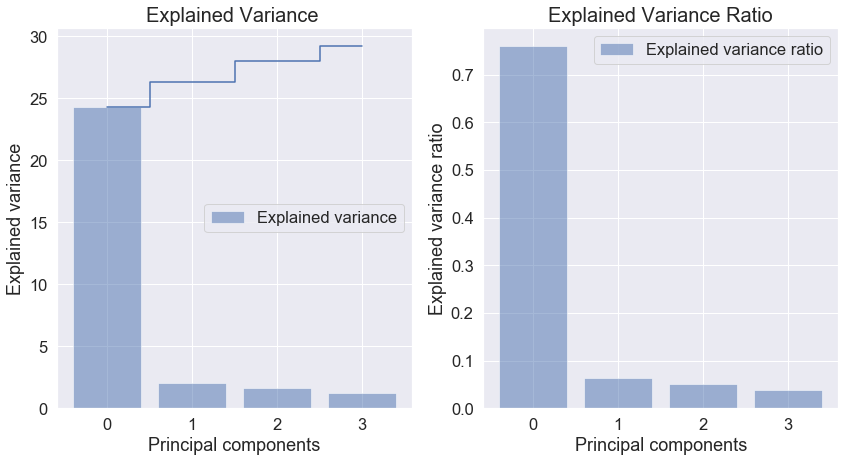

In [71]:
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)

plt.bar(range(4), 
        explained_variance, 
        alpha=0.5, 
        align='center', 
        label='Explained variance')

plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.title("Explained Variance ", fontsize=20)
plt.legend(loc='best')

plt.step(range(4), np.cumsum(svd.explained_variance_), where='mid',label='cumulative explained variance')

plt.subplot(1, 2, 2)

plt.bar(range(4), 
        explained_variance_ratio, 
        alpha=0.5, 
        align='center', 
        label='Explained variance ratio')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title("Explained Variance Ratio", fontsize=20)
plt.legend(loc='best');

## Summary 

In relation to text mining, SVD provides the mathematical foundation for text mining and classification techniques generally known as __latent semantic indexing__. 

In SVD, the matrix A is typically a __word x document matrix__, it is a way of representing the document and text as a highly dimensional vector space model.  

Similarly  to PCA , SVD takes high dimensional highly variable data and reduces it to a lower dimensional space that more clearly depicts the underlying structure of the data.  

SVD reduces noise and redundancy in the data leaving you with new dimensions that capture the essence of existing relationships.   

With regard to text mining, SVD has the following interpretation:

- words are represented as rows in U
- word similarity can be determined by examining the rows in the matrix US

- documents are represented as rows in V
- document similarity can be determined by examining rows in VS


#### Assume 

- matrix A represents an m x n word occurrence matrix where m is the number of input documents (files) and n the number of words selected for analysis. 

    - SVD computes the m x r orthogonal matrix U, 
    - n x r orthogonal matrix V, and 
    - r x r matrix D, so that A = UDV', and so that r is the number of eigenvalues of A'A.